In [8]:
# === Import dependencies ===
import numpy as np
import matplotlib.pyplot as plt
from ffnn import FeedForwardNN
from data_loader import load_fashion_mnist

In [14]:
# === Load Fashion-MNIST dataset ===
X_train, y_train, X_test, y_test = load_fashion_mnist()

# split off 10% of training data for validation
val_size = int(0.1 * X_train.shape[0])
X_val, y_val = X_train[:val_size], y_train[:val_size]
X_train, y_train = X_train[val_size:], y_train[val_size:]

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (54000, 784), Val: (6000, 784), Test: (10000, 784)


In [15]:
def accuracy(y_true, y_pred):
    # === Calculate accuracy ===
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [16]:
# === Initialize Feedforward Neural Network ===
model = FeedForwardNN(
    layer_sizes=[784, 128, 64, 10],
    activation='relu',
    output_activation='softmax'
)

In [26]:
# === Set training hyperparameters ===
epochs = 100
lr = 0.1
losses, val_accs = [], []

In [27]:
# === Training Loop ===
# 1. forward propagation
# 2. computer loss
# 3. backward propagation
# 4. optimize parameteres
# repeat for epochs

for epoch in range(epochs):

    y_pred_train, cache = model.forward(X_train[:5000])
    loss = model.compute_loss(y_train[:5000], y_pred_train)
    
    grads = model.backward(y_train[:5000], cache)
    model.update_params(grads, lr)
    
    train_acc = accuracy(y_train[:5000], y_pred_train)
    y_pred_val, _ = model.forward(X_val[:1000])
    val_acc = accuracy(y_val[:1000], y_pred_val)
    
    losses.append(loss)
    val_accs.append(val_acc)
    
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")


Epoch 1/100 | Loss: 1.1257 | Train Acc: 0.6722 | Val Acc: 0.6890
Epoch 11/100 | Loss: 1.1532 | Train Acc: 0.6572 | Val Acc: 0.6550
Epoch 21/100 | Loss: 0.8933 | Train Acc: 0.7024 | Val Acc: 0.6820
Epoch 31/100 | Loss: 0.8129 | Train Acc: 0.7138 | Val Acc: 0.7030
Epoch 41/100 | Loss: 0.7871 | Train Acc: 0.7346 | Val Acc: 0.7270
Epoch 51/100 | Loss: 0.7312 | Train Acc: 0.7212 | Val Acc: 0.7370
Epoch 61/100 | Loss: 0.7323 | Train Acc: 0.7258 | Val Acc: 0.7560
Epoch 71/100 | Loss: 0.6668 | Train Acc: 0.7602 | Val Acc: 0.7670
Epoch 81/100 | Loss: 0.6719 | Train Acc: 0.7566 | Val Acc: 0.7650
Epoch 91/100 | Loss: 0.6516 | Train Acc: 0.7584 | Val Acc: 0.7650
Epoch 100/100 | Loss: 0.6119 | Train Acc: 0.7854 | Val Acc: 0.7710


In [28]:
y_pred_test, _ = model.forward(X_test[:2000])
test_acc = accuracy(y_test[:2000], y_pred_test)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")


✅ Final Test Accuracy: 0.7680


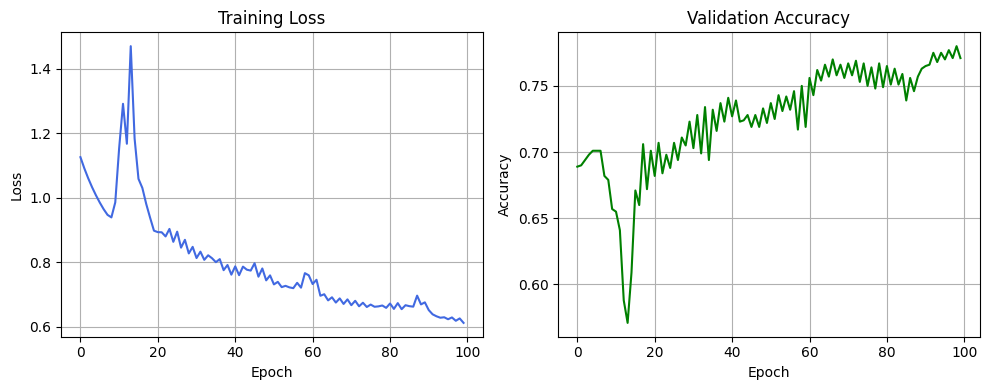

In [29]:
# === Visualize training loss and validation accuracy ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses, color='royalblue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(val_accs, color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()